# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Необходимо определить наличие влияния семейного положения и количества детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Загрузка и изучение данных

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 

from collections import Counter
from pymystem3 import Mystem

In [2]:
df = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_2(sp4)\data.csv')
#чтение предоставленного файла 

In [3]:
df.head(10) #вывод первых 10 строк массива df для получения общего представленя о содержании таблицы

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
df.info(10)#получение cводной информации о содержании таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
df.describe(include = 'all')#получение статистик

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,1.935100e+04,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,среднее,NaN,женат / замужем,NaN,F,сотрудник,NaN,NaN,свадьба
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,1.674223e+05,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,1.029716e+05,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,2.066726e+04,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.030532e+05,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,1.450179e+05,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,2.034351e+05,NaN


Согласно пердложенному описанию данных таблица отображает следующую информацию (по колонкам соответсвенно):

    children — количество детей в семье
    days_employed — общий трудовой стаж в днях
    dob_years — возраст клиента в годах
    education — уровень образования клиента
    education_id — идентификатор уровня образования
    family_status — семейное положение
    family_status_id — идентификатор семейного положения
    gender — пол клиента
    income_type — тип занятости
    debt — имел ли задолженность по возврату кредитов
    total_income — ежемесячный доход
    purpose — цель получения кредита

Таблица включает 21525 строк и 12 столбцов и представлена такими типами данны как object, int64, float64 (в зависимсости от описываемого столбца). 

По отдельным столбцам (days_employed, total_income) присутствуют пропуски данных.

Значения колонки days_employed представлены в неудобном для восприятия формате - вещественные числа(отрицательные и положительные), кроме того в пятой строке видно наличие артефакта - 340266.072047 дней - что соответсвует более чем 900 годам трудового стажа.

Значения колонки education записаны в разном регистре .

Значения колонки purpose не унифицированы (при идентичных по смыслу целях получения кредита формулировки могут отличаться).

В таблице отсутствую данные, позволяющие точно идентифицировать клиента (личный учётный номер(ID), блок "фамилия, имя, отчетсво", номер мобильного телефона или адрес регистрации), что, возможно, может сказаться на их дальнейшей обработке. 

In [6]:
df.columns #получение перечня названий столбцов таблицы

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Замечания к стилю оформления названий столбцов отсутсвтуют (латиница, нижний регистр, "змеиный стиль", отсутсвие пробелов и отступов).

**Вывод**

Каждая строка таблицы содержит информацию о потенциальном клиенте-кридитозаемщик. В колонках можно выделить следующие блоки  информации: общая информация о клиенте (возраст, пол, уровень образования), семейное положение (количество детей, статус семеных отношений),информация о трудовой деятелности (стаж работы, тип занятости), прочие данные,  необходимые банку для оценки возможности выдачи кредита (уровень дохода, цель кредита, наличие просрочек погашения кредита).

Необходимо обработать пропуски данных, проверить наличие дубликатов, проанализировать тип данных и устранить проблемы, связанные с унификацией значений отдельных столбцов. 

## Предобработка данных

### Обработка пропусков

In [7]:
df.isna().sum() #определим колличество пропущенных значений в столбцах 

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В подтверждение информации, полученной на этапе ознакомления с данными, имеем по 2174 пропуска в двух столбцах:
'days_employed' и 'total_income' 

Выдвинем и проверим предположение, что пропуски в 'days_employed' и 'total_income' находятся в одних и тех же строках и между ними существует какая-либо взаимосвязь.

Для точного подтверждения совпадения отсутсвия данных в столбцах 'days_employed' и 'total_income' в одних и тех же строках по всей таблице проведем логическое сложение по двум столбцам  c применением булиевых значений наличия/отсутсвия значений и применим метод подсчета уникальных значений к полученной серии. Если количество значений True(логическая сумма для пустых значений) будет равна вышеполученным значениям количества пропусков в обоих столбцах, то есть 2174 - предположение верно, если больше - значит пропущенные значения находятся в разных строках.

In [8]:
(df.days_employed.isna() & df.total_income.isna()).value_counts()

False    19351
True      2174
dtype: int64

Предположение верно, 2174 значения пропущены в столбцах 'days_employed' и 'total_income' в одних и тех же строках.

Наличие подобного рода связи в исследуемом массиве данных может быть результатом некорректной обработки получаемых от клиентов данных (различие в банковском ПО или его версиях и настройках в разных отделениях банка, различие в служебных инструкциях и индивидуальные особенности банковских служащих, некорректная работа web-форм для on-line обслуживания клиентов) и последующего их объединения в общий статистический файл в целом по банку или его структурному подразделению.

Проведем экспересс - анализ на наличие в столбцах пропусков-плейсхолдеров. Ввиду большого объема данных попробуем найти пропуски такого типа  методом value_count() в тех столбцах, где вероятность получения длинного списка уникальных значений мала: типы показателей и значения их индфикатора id. А стобцы с большим объемом числовых записей ('days_employed', 	'dob_years', 'total_income') исследуем на значения минимумов, максимумов и нулей, как пердполагаемых плейсхолдеров.

In [9]:
lower_list = ['children', 'education', 'education_id','family_status_id', 'family_status', 'gender', 'income_type', 'debt', 'purpose']

for i in lower_list:
    display(i)
    display(df[i].value_counts())
    

'children'

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

'education'

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

'education_id'

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

'family_status_id'

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

'family_status'

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

'gender'

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

'income_type'

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

'debt'

0    19784
1     1741
Name: debt, dtype: int64

'purpose'

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Просморт на предмет пропусков-плейсхолдеров выявил следующие особенности: 

1- в столбце 'children' два явных "артефакта": 76 записей со значением "20", 47 записей со значеним "-1": если гворить о значении "-1", то тут явно видна ошибка с занесением (например использование знака "минус" в качестве дефиса), для значения "20" не всё очевидно, это могут буть и реальные семьи(например, с приемными детьми), а может быть и ошибка, ведь между значениями в пять и двадцать детей других значений нет - четко определить границу истинности таких данных сложно.

2- в столбце пола клиента 'gender' присутствует значение 'XNA', что вероятно соответствует ошибке; 

3 -  количество "номеров" идентификатор 'education_id' и 'family_status_id' совпадает с количетвом уникальных значений столбцов 'education', 'family_status' без учета регистра - что может означать отсутствие дубликатов (обнаруженное наличие разного регистра в записях данных можно использовать для дальнейше обработке и определении дубликатов).


Для чистоты возможных исследований в зависимости от количества детей и пола заемщика обработаем данные следующим образом: отрицательные значения по количеству детей приведем к положительным, для занчений - 20 проведем удаление строк, для строки, содержащей значение пола клиента 'XNA' также проведем удаление (потеря данных 77/21525 * 100 = 0,36%).

In [10]:
df = df[df['children'] != 20].reset_index(drop=True)
df = df[df['gender'] != 'XNA'].reset_index(drop=True)
df.loc[df['children'] == -1, 'children'] = df['children'].abs()

In [11]:
df['gender'].value_counts()

F    14189
M     7259
Name: gender, dtype: int64

In [12]:
df['children'].value_counts()#проверка уникальных значений

0    14148
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Анализ столбцов 'days_employed', 'dob_years', 'total_income' на значения минимумов, максимумов и нулей, как пердполагаемых плейсхолдеров (часто повторяющихся и имеющих "характерный" вид -  несколько одинаковых цифровых знаков).

In [13]:
maximum = [df['days_employed'].max(), df['dob_years'].max(), df['total_income'].max()] 
maximum_count = [df[df['days_employed'] == df['days_employed'].max()]['days_employed'].count(),
                df[df['dob_years'] == df['dob_years'].max()]['dob_years'].count(),
                df[df['total_income'] == df['total_income'].max()]['total_income'].count()]
minimum = [df['days_employed'].min(), df['dob_years'].min(), df['total_income'].min()]
minimum_count = [df[df['days_employed'] == df['days_employed'].min()]['days_employed'].count(),
                df[df['dob_years'] == df['dob_years'].min()]['dob_years'].count(),
                df[df['total_income'] == df['total_income'].min()]['total_income'].count()]
zero_count = [df[df['days_employed'] == 0]['days_employed'].count(),
             df[df['dob_years'] == 0]['dob_years'].count(),
             df[df['total_income'] == 0]['total_income'].count()]

pd.DataFrame({'name':['days_employed','dob_years','total_income'],#создание сводной таблицы 
              'maximum': maximum,
              'maximum_count': maximum_count,
              'minimum': minimum,
              'minimum_count' : minimum_count,
              'zero_count' : zero_count})

,name,maximum,maximum_count,minimum,minimum_count,zero_count
0,days_employed,4.017554e+05,1,-18388.949901,1,0
1,dob_years,7.500000e+01,1,0.000000,100,100
2,total_income,2.265604e+06,1,20667.263793,1,0


Также проведем анализ неграничных значений столбцов 'days_employed', 'dob_years', 'total_income' на предмет частоты повторения уникальных значений.

In [14]:
 df['days_employed'].value_counts().head(10)

-986.927316       1
-7373.150635      1
-4906.125062      1
-1893.222792      1
-849.764227       1
-1741.489608      1
-5135.928528      1
-1453.358707      1
-4977.646061      1
 396078.542064    1
Name: days_employed, dtype: int64

In [15]:
 df['dob_years'].value_counts().head(10)

35    615
40    605
41    605
34    600
38    597
42    594
33    579
39    572
31    558
36    553
Name: dob_years, dtype: int64

In [16]:
 df['total_income'].value_counts().head(10)

1.128744e+05    1
1.339123e+05    1
1.820367e+05    1
1.224220e+05    1
1.982718e+05    1
1.091136e+05    1
1.643202e+05    1
9.105355e+04    1
1.043819e+05    1
1.091628e+06    1
Name: total_income, dtype: int64

Анализ представленной таблицы и повторений уникальных значений позволяет сделать заключение о том, то в качестве плейсхолдеров из всех рассматриваемых столбцов существуют 100 строк со значением в столбце возраста заёмщика 'dob_years' равным нулю (такое значение противоречит нормальным значениям возраста). Возраст уникальная характеристика заемщика, теоритически заполнить пропуски, обозначенные нулями можно на основании значений стажа, но в данных по стажу также могут содержаться пропуски. Ввиду малого количества значений пропусков в столбце 'dob_years' по отношению к общему количеству данных ((100+77)/21525*100 = 0,83%) выполним их удалениие.

In [17]:
df = df[df['dob_years'] != 0].reset_index(drop=True) #создание таблицы без нулевых значений возраста
df.info() #число строк должно уменьшиться и составить на 177 меньше, то есть 21348

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 12 columns):
children            21348 non-null int64
days_employed       19193 non-null float64
dob_years           21348 non-null int64
education           21348 non-null object
education_id        21348 non-null int64
family_status       21348 non-null object
family_status_id    21348 non-null int64
gender              21348 non-null object
income_type         21348 non-null object
debt                21348 non-null int64
total_income        19193 non-null float64
purpose             21348 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [18]:
df[df['dob_years'] == 0]['dob_years'].count() #проверка на наличие пустых значений возраста

0

In [19]:
df.isna().sum() #определим колличество оставшихся явных пропусков

children               0
days_employed       2155
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2155
purpose                0
dtype: int64

Далее рассмотрим вариант заполнения явных пропусков, 2155 оставшихся после проведенных операций пропущеных значения составляет от общего количества строк 21525 - 10%, поэтому удаление строк с пропущенными значениями может сказаться на общем выводе исследования. Замена пропусков на нули в столбцах со значениями трудового стажа и совокупного дохода выглядит некорректно.

Для замены пропусков будем исходить из следующей стратегии: пердположим, что трудовой стаж в первую очередь должен быть связан с возрастом заемщика и, возможно, его значение как-либо заисит от пенсионного статуса (хотя значения стажа также могут сильно зависить от целого ряда причин (профессия, вредность, регион приобретения стажа) которые в текущем исследовании не описываются). А для заполнения пропусков в столбе 'total_income' исследуем его связь с уровнем образования и статусом занятости.

---

*Анализ связи трудового стажа с возрастом клиента и заполнение пропусков в столбце 'days_employed'*

При первичном анализе данных таблицы было обнаружено, что значения трудового стажа пердставляют из себя вещественные числа, и при этом имеют как положительные, так и отрицательные значения. При этом положительные значения справедливы для клиентов со статусом "пенсионер" 'income_type'. Проверим эту зависимость.

In [20]:
df[(df['days_employed'] < 0) & ((df['income_type'] == 'пенсионер'))]
#проверка условия отсутствия отрицательного трудового стажа для клиентов, достигших пенсионного возраста

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [21]:
df[(df['days_employed'] >= 0) & (df['income_type'] != 'пенсионер')]
#проверка условия отсутствия неотрицательного трудового стажа для клиентов без статуса "пенсионер"

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3112,1,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи
14671,0,395302.838654,45,Высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью


Предположение оказалось верным: среди клиентов-пенсионеров нет тех, у кого бы был отрицательный трудовой стаж, а среди клиентов с положительным трудовым стажем нет клиентов не относящихся к "пенсионерам", и только два клиента имеют статус "безработных" (возможно при получении данных от клиентов для столбца 'income_type' значение "безработный" отождествлялась со статусом "пенсионер"). Если статус клиента "пенсионер" то для замены пропуском по трудовому стажу справедливо использовать только положительные значения. И наоборот если клиент не является пенсионером, то его трудовой стаж должен быть указан в отрицательных единицах.

In [22]:
df[(df['income_type'] == 'пенсионер') & (df['days_employed'].isna())]['income_type'].count()
#количество пропусков в столбце 'days_employed' для клиентов с типом занятости 'income_type' "пенсионер"

408

Оценим также наличие в 'days_employed' таких артефактов, замеченных при первичном анализе, как значения явно выбивающиеся за нормальные пределы для указонных единиц измерения - часы. Учитывая продолжительность жизни и максимально возможный трудовой стаж (в период от 14 до 65 лет) абсолютное значение величины трудового стажа не может превышать 65-14 = 51 год или 18627 дней.

In [23]:
df[(df['days_employed'].abs() >= 18627) & (df['income_type'] == 'пенсионер')]['days_employed'].count()
#проверим справедливо ли наличие подобного рода значений только для пенсионеров

3419

In [24]:
df[df['income_type'] == 'пенсионер']['days_employed'].count() #общее количество записей стажа для пенсионеров

3419

In [25]:
df[(df['days_employed'].abs() >= 18627) & (df['income_type'] != 'пенсионер')]
#проверим, справедливо ли наличие подобного рода высоких значений для остальных категорий занятости 
#df[(df['income_type'] == 'пенсионер') & (df['days_employed'].abs() >= 18627)].count()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
3112,1,337524.466835,31,среднее,1,женат / замужем,0,M,безработный,1,59956.991984,покупка жилья для сдачи
14671,0,395302.838654,45,Высшее,0,гражданский брак,1,F,безработный,0,202722.511368,ремонт жилью


Из представленого миниисследования можно заключить, что все положительные значения для стажа - это значения для клиентов со статусом пенсионер (и двух безработных, которые ими же, возможно, и являются). Для клиентов с другими типом занятости  'days_employed' значения на 2-3 порядка ниже и представлены исключительно отрицательными значениями. Можно предположить, что либо при записи стажа для пенсионеров был ошибочно изменен порядок значений (например увеличен на 2), либо запись значений произведена в других единицах, не днях, а, например, в часах. Вероятно, существует свой "особый" порядок заполнения стажа для клиентов с разным типом занятости (что косвенно также подтверждается записью в стаж отрицательных значений для "непинсионеров").

Будем руководствоваться следующим предположением: стаж для клиентов, не являющихся пенсионерами, записан в часах отностиельно даты выгрузки файла или занесениия данных в таблицу (возможно он даже динамически менятся в базе данных сайта с наступлением новых суток), тогда для более молодых клентов стаж будет больше (в абсолютных значениях меньше), так как начало их тудовой деятельности находится ближе к дате формирования данных. Для клиентов-пенсионеров можно выдвинуть две версии: 1) стаж закрыт,  он не увеличивается, и он, что важно, может быть точно подсчитан в часах, и расчет его проведен от точки начала трудовой деятельности к дате выхода на пенсию; 2) стаж также подсчитан от точки начала трудовой деятельности к дате выхода на пенсию, плюс вермя в часах от даты выхода на пенсию к текущей дате. Первое предположение выглядит более рациональным, так как собственно отражает саму величину стажа чётко в часах без поправки на текущее время. Вероятно это сделано, чтобы строго различать клиентов и их возможности. 

Для проверки этой гипотезы поделим предоставленные занчения стажа для пенсионеров на 8760 (число дней году) и узнаем средний стаж к моменту выхода на пенсию. Если пердположить что трудовой стаж для к выходу на пенсию для женщих - 37 лет (55-18), для мужчин - 42 года(60-18), то средний стаж в целом должен определяться величиной около 41 года.

In [26]:
(df[df['income_type'] == 'пенсионер']['days_employed'] / 8760).mean()
#средний стаж к моменту выхода на пенсю в годах(без учёта "високосности" лет)

41.66943384835783

Предположение верно.

Для заполнения пропусков в столбце 'days_employed' медианными значениями в соответствии с возрастом приведем значния стажа к единому образцу: положительные значения, выраженные в часах. Для этого умножим на "-1" отрицательные значения, а для клиентов с типами занятости "пенсионер" и "безработный" значния столбца занятости поделим на 24.

In [27]:
df.loc[df['income_type'] == 'пенсионер', 'days_employed'] = df['days_employed'] / 24
df.loc[df['income_type'] == 'безработный', 'days_employed'] = df['days_employed'] / 24
df.loc[df['days_employed'] < 0, 'days_employed'] = df['days_employed'].abs() 

Для заполнения пропусков в столбце 'days_employed' медианными значениями в соответствии с возрастом приведем значния стажа к единому образцу: положительные значения, выраженные в часах. Для этого приведём к модулю отрицательные значения, а для клиентов с типами занятости "пенсионер" и "безработный" значния столбца занятости поделим на 24.

Произведем замену пропусков 'days_employed' на основании медианных значений стажа для сгруппированных по возрастам данных.

In [28]:
df['days_employed'] = df['days_employed'].fillna(df.groupby('dob_years')['days_employed'].transform('median'))
df.info()
df[df['days_employed'].isna()]# проверка отсутствия пропусков в столбце 'days_employed'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 12 columns):
children            21348 non-null int64
days_employed       21348 non-null float64
dob_years           21348 non-null int64
education           21348 non-null object
education_id        21348 non-null int64
family_status       21348 non-null object
family_status_id    21348 non-null int64
gender              21348 non-null object
income_type         21348 non-null object
debt                21348 non-null int64
total_income        19193 non-null float64
purpose             21348 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Замена произведена.

---


*Анализ связи дохода с уровнем образования и типом занятости клинета и заполнение пропусков в столбце 'total_income'*


Для заполнения пропусков в столбе 'total_income' исследуем его связь с уровнем образования и статусом занятости.


In [29]:
education_id = sorted(df['education_id'].unique()) 
#создадим список индикаторов образования медианное значение дохода в которых мы хотим найти
display(education_id)

[0, 1, 2, 3, 4]

Индикаторов образования 4: 0 - высшее, 1 - среднее, 2 - неокончнное высшее, 3 - начальное, 4 - ученая степень.


In [30]:
median_income_list1 = [] #пустой список для получения списка медианных значений дохода 

for i in range(len(education_id)): #цикл для вычисления медианных значений
    a = df[df['education_id'] == education_id[i]]['total_income'].median()
    median_income_list1.append(a)
display(median_income_list1)

[175410.87691919974,
 136470.30537097054,
 160401.1307841331,
 117137.35282495995,
 157259.8985551767]

Связь очевидна: чем выше уровень образования - тем выше уровень дохода; самый большой доход у клиентов с вышим образованием, самый низкий - у людей с начальным. Но разброс данных невелик - всего в несколько десятков тысяч. Возможно для значений дохода не так важен уровень образования, как то, кем человек работает и как устроился в жизни.
Проверим медианный уровень дохода для разных типов занятости в столбце 'income_type'.

In [31]:
income_type_id = sorted(df['income_type'].unique())
#создадим список индикаторов типа занятости
display(income_type_id)

['безработный',
 'в декрете',
 'госслужащий',
 'компаньон',
 'пенсионер',
 'предприниматель',
 'сотрудник',
 'студент']

In [32]:
median_income_list2 = [] #пустой список для получения списка медианных значений дохода 

for i in range(len(income_type_id)): #цикл для вычисления медианных значений
    a = df[df['income_type'] == income_type_id[i]]['total_income'].median()
    median_income_list2.append(a)
    
display(median_income_list2)

[131339.7516762103,
 53829.13072905995,
 150475.72029029814,
 172357.95096577113,
 118480.8374078531,
 499163.1449470857,
 142601.2047183938,
 98201.62531401133]

Здесь степень разброса значений больше (в несколько сотен тысяч) и гораздо точнее отражает окружающую действительность.
Самый большой доход у предпринимателей, самый маленький - у лиц в декрете и студентов.

Полученный список медианного уровня дохода в зависимости от уровня образования можно использовать для заполнения пропусков в столбце 'total_income' вероятнее выгоднее для получения данных блихзких к реальности.

Произведем замену пропусков 'total_income' на основании медианных значений дохода для сгруппированных по типу занятости данных.



In [33]:
df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))
df.info()
df[df['total_income'].isna()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 12 columns):
children            21348 non-null int64
days_employed       21348 non-null float64
dob_years           21348 non-null int64
education           21348 non-null object
education_id        21348 non-null int64
family_status       21348 non-null object
family_status_id    21348 non-null int64
gender              21348 non-null object
income_type         21348 non-null object
debt                21348 non-null int64
total_income        21348 non-null float64
purpose             21348 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Замена произведена. Пропуски в таблице отсутсвуют.

**Вывод**

При исследовании таблицы  было обнаружено явных 2174 пропуска по столбцам 'days_employed' и 'total_income', и пропуски, которые можно отнести к плейсхолдерам по столбцам 'gender' (значение "XNA") и 'dob_years'(значение 0), которые ввиду малого количества данных по отношению к исходной таблицы были удалены. Кроме того, были испралены явные и неявные ошибки в столбце 'children', значения столбца 'days_employed' были приведены к единому формату.


Для замены пропусков в столбце 'days_employed' были использованы медианные значения стажа для сгрупированных по столбцу 'dob_years' - возраст заемщика.

Для замены пропусков в столбце 'total_income' были использованы медианные значения дохода для сгрупированных по столбцу 'income_type' - тип занятости. 

Пропуски заполнены.

### Замена типа данных

Значения о стаже 'days_employed' и доходе 'total_income' клиента приведены в таблице в формате 'float64'. Для удобного отображения и последующего использования приведем их к типу 'int'. На выходе получем округленные для целочисленных значений дни и рубли. Так как данные в обоих столбцах данные однородны и представляют из себя числовые символы, то для замены типа данных используем метод astype().

In [34]:
df = df.astype({'days_employed': 'int', 'total_income': 'int'})

**Вывод**

При анализе типа данных используемых для столбцов, было выявлено что для days_employed и total_income используются данные типа 'float'. Для более удобного использования данные приведены к целочисленному типу 'int' при помощи метода astype().

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 12 columns):
children            21348 non-null int64
days_employed       21348 non-null int32
dob_years           21348 non-null int64
education           21348 non-null object
education_id        21348 non-null int64
family_status       21348 non-null object
family_status_id    21348 non-null int64
gender              21348 non-null object
income_type         21348 non-null object
debt                21348 non-null int64
total_income        21348 non-null int32
purpose             21348 non-null object
dtypes: int32(2), int64(5), object(5)
memory usage: 1.8+ MB


### Обработка дубликатов

Проведем анализ данных на наличие дубликатов: полных и неявных. Основными причинами появления дубликатов могут быть повторные внесения данных в таблицу, неправильное соединение данных из разных источников, ошибки при занесении информаци.

In [36]:
df.duplicated().sum() #проверка на наличие полных дубликатов

54

При поиске дубликатов было отмечено, что значения в разных регистрах записаны только для столбцов 'education' и 'family_status'. Приведем их к нижнему регистру.

In [37]:
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()

In [38]:
df.duplicated().sum() #проверка на наличие полных дубликатов

71

Обнаружена 71 строка-дубликат с учётом приведения текстовой информации к нижнему регистру, удалим их из таблицы.

In [39]:
df = df.drop_duplicates().reset_index(drop=True)# удаление дубликатов
df.duplicated().sum()

0

**Вывод**

Поиск дубликатов осуществлялся методами duplicated() и sum(). Приведение отдельных столбцов к нижнему регистру позволило выявить дополнительные дубликаты.

Произведено удаление дубликатов - 71 строки.

### Лемматизация

Для анализа данных на основании целей кредита проведем лемматизацию столбца 'purpose' для приведения к словарной форме слов, образующих значение цели кредита.

Для лемматизации используем русскоязычный лемматизатор Mystem библиотеки pymystem3. Для того, чтобы ускорить лемматизацию без многократного (для каждой строки) вызова лемматизаотора из внешнего файла объеденим все цели кредита в один список с помощю какого-либо символа (например, _ ) проведем однократную лемматизацию списка, после чего создаим серию лемм для каждой строчки, разделив полученный список по уже используемому ранее символу.

In [40]:
purpose_list = '_'.join(df['purpose'].tolist())

In [41]:
purpose_lemma_list = Mystem().lemmatize(purpose_list)

In [42]:
df['purpose_lemma'] = ''.join(purpose_lemma_list).split(sep='_')

In [43]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemma
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,покупка жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,приобретение автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,покупка жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,дополнительный образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,сыграть свадьба


Для целей подсчета упоминания уникальных лемм выделим леммы по одиночным словам и проведем их подсчет с сортировкой по убыванию.

In [44]:
single_word_lemmas = ' '.join(df['purpose_lemma'].tolist()).split(sep=' ') #получение списка лемм из отдельных слов

In [45]:
unique_lemmas = sorted(Counter(single_word_lemmas).items(), key=lambda x: x[1], reverse=True)
# получение отсортированного  по убыванию словаря с подсчитанным колличеством упоминаний уникальных лемм

In [46]:
unique_lemmas_name = [] 
unique_lemmas_count = []
for i in range(0, len(unique_lemmas)):
    unique_lemmas_name.append(unique_lemmas[i][0])
    unique_lemmas_count.append(unique_lemmas[i][1])

In [47]:
unique_lemmas
# получение отсортированного  по убыванию словаря с подсчитанных колличеством упоминаний уникальных лемм

[('недвижимость', 6306),
 ('покупка', 5851),
 ('жилье', 4421),
 ('автомобиль', 4268),
 ('образование', 3980),
 ('с', 2891),
 ('операция', 2583),
 ('свадьба', 2301),
 ('свой', 2219),
 ('на', 2200),
 ('строительство', 1866),
 ('высокий', 1360),
 ('получение', 1306),
 ('коммерческий', 1299),
 ('для', 1284),
 ('жилой', 1221),
 ('сделка', 934),
 ('заниматься', 900),
 ('дополнительный', 898),
 ('подержать', 840),
 ('проведение', 760),
 ('сыграть', 756),
 ('сдача', 648),
 ('семья', 636),
 ('собственный', 627),
 ('со', 626),
 ('ремонт', 603),
 ('приобретение', 459),
 ('профильный', 433),
 ('подержанный', 112),
 ('автомобиль\n', 1)]

(-1.1015910139855987,
 1.100075762570956,
 -1.100296636597653,
 1.1037833230159244)

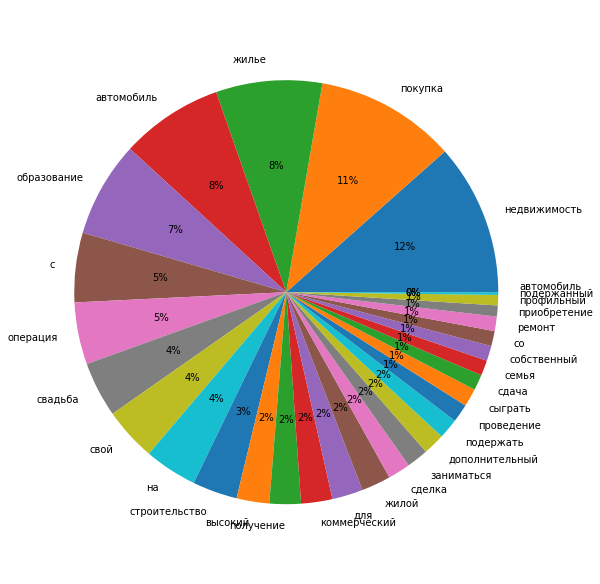

In [48]:
fig, ax = plt.subplots(figsize=(8,8), constrained_layout=True)
ax.pie(unique_lemmas_count, labels=unique_lemmas_name, autopct='%1.0f%%')
ax.axis("equal")

**Вывод**

Создан новый столбец с леммами для каждой строки. После знаков пробела и переноса строки на первом месте идут упоминания о сделках с недвижимостью, затем - автомобили, что, вероятно, соответствует действительности исходя из ценовых категорий этих товаров. Если исключить из перечня полученных лем вспомогательные по смысловой нагрузке слова, то в первую тройку целей кредита водут покупка недвижимости, приобретение автомобиля, и получение образовательных услуг, что отражает действительность.

### Категоризация данных

Для анализа данных по отдельным группам произведём категоризацию данных, это даст возможность создавать запросы по отдельным категориям и выявлять закономерности между ними.

При знакомстве с содержимым файла было отмечено соответствия столцов  значений уровня образования 'education' и его идентификатора 'education_id', а также семейного статуса 'family_status' и его идентификатра 'family_status_id', то есть эти данные уже по сути категоризованы по своим идентификаторам.

Выделим в  отдельные словари словари категории данных по уровню образования и семейному статусу.

In [49]:
education_dict = df[['education', 'education_id']].drop_duplicates().reset_index(drop=True)
education_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [50]:
family_dict = df[['family_status', 'family_status_id']].drop_duplicates().reset_index(drop=True)
family_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


Для получения зависимостей возврата кредита в срок от наличия детей, уровня дохода и целей и следует выделить отдельные категории данных:

по уровню дохода - низкий, средний, высокий(в том числе в значениях дохода)

по цели кредита - на основании лемм цели

Создадим функцию для категоризации данных по уровню дохода, выделив следующие условные уровни дохода: до 50000 (можно трактовать как низкий уровень), 50000-100000, 100000-200000, 200000-500000, >500000 (можно трактовать как сверхвысокие доходы). При выделенни таких категорий необходимо принимать во внимание высокую степень расслоения населения по уровню доходов. Учитывая примерные размеры минимальной оплаты труда и наличие на содержании, например, 1-2 детей, можно отностиельно чётко сказать, что доходы в 50000 и менее можно отнести к низким, они хоть как-то могут обеспечивать базовые потребности человека. Дохододы в 500000 более характерны для небольшой социальной прослойки, но они имеют место быть. Ежесуточная норма расхода (доход на 1 день) явно превышает размеры минимальной оплаты труда, доходы в 500000 и более можно без колебаний отнести к высоким и даже сверх высоким. Четко же определить границы среднего дохода не представляется возможным: это зависит и от потребностей конкретного человека и от места его проживания. Выделим условно три подгруппы среднего дохода между обозначенными низкими и высокими доходами таким образом, что их границы будут увеличиваться относительно предыдущей группы примерно в 2 раза.

In [51]:
def income_group(income):
    if income <= 50000:
        return '<= 50000'
    elif 50000 < income <=100000:
        return '50000-100000'
    elif 100000 < income <=200000:
        return '100000-200000'
    elif 200000 < income <=500000:
        return '200000-500000'
    else:
        return '>500000'

df['income_group'] = df['total_income'].apply(income_group)

Создадим функцию для категоризации данных по цели кредита. В словаре лемм можно однозначно выделить следующие основные цели кредита: образование, автомобиль, свадьба, операции с жилой недвижимостью, операции с коммерческой недвижимостью, иные операции с недвижимостью.

In [52]:
def purpose_group(lemmas):
    if 'свадьба' in lemmas:
        return 'свадьба'
    elif 'автомобиль' in lemmas:
        return 'автомобиль'
    elif 'образование' in lemmas:
        return 'образование'
    elif ('жилье' or 'жилой') in lemmas:
        return 'операции с жилой недвижимостью'
    elif ('коммерческий' in lemmas) & ('недвижимость' in lemmas):
        return 'операции с коммерческой недвижимостью'
    elif 'недвижимость' in lemmas:
        return 'иные операции с недвижимостью'
    else:
        return 'иное'

df['purpose_group'] = df['purpose_lemma'].apply(purpose_group)

Категорированная таблица для анализа может выглядить следующим образом.

In [53]:
df_analis = df[['children', 'days_employed', 'dob_years',  'education_id', 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'income_group', 'purpose_group']]
df_analis.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,income_group,purpose_group
0,1,8437,42,0,0,F,сотрудник,0,253875,200000-500000,операции с жилой недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,100000-200000,автомобиль
2,0,5623,33,1,0,M,сотрудник,0,145885,100000-200000,операции с жилой недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,200000-500000,образование
4,0,14177,53,1,1,F,пенсионер,0,158616,100000-200000,свадьба


**Вывод**

Проведена категоризация данных, выделены три дополнительные категории: по наличию детей, по уровню дохода, по унифицированной цели кредита. При необходимости в сущетвующей таблице также можно выделить группы по возрасту,а на основе данных о типе занятости выделить группы на наличие или отсутствие статуса "пенсионера".

## Оценка зависимости возврата крелита в скрок от различных факторов

### Оценка зависимости между наличием детей и возвратом кредита в срок

In [54]:
children_dep = df.groupby('children').agg({'debt' : ['sum', 'count', 'mean']})
children_dep

debt                 
           sum  count      mean
children                       
0         1058  14021  0.075458
1          442   4839  0.091341
2          194   2039  0.095145
3           27    328  0.082317
4            4     41  0.097561
5            0      9  0.000000

**Вывод**

Для семей с 5 детьми исходя из данных характерно отсутствие просрочек вообще, однако, такие данные могут быть необъективны, так как в таблицу из более чем 20000 строк попали только 9 заемщиков с таким количеством детей. Следующая по возрастанию числа просрочек идет категория бездетных клиентов. Это очевидно, учитывая тот факт что, у таких заемщиков нет обязательных статей расхода на содержание и воспитание детей. Делее по возрастанию идет следующая зависимость: чем больше детей, тем больше просрочек, что можно также объяснить прямой зависимостью расходов от количества детей. Выбивается из этого ряда только значение в отношении заемщиков с 3 детьми -  тут просрочек мньше примерно на 1 процент по отношению к другим категориям с детьми, однако число таких заемщиков также невилико около 1,5% от общего числа. Таким образом, вероятно, что при наличии равного числа записей по клиентам с разным колличеством детей существует некая тенденция роста колличетва просрочек от колличества детей.

### Оценка зависимости между семейным положением и возвратом кредита в срок

In [55]:
family_status_dep = df.groupby('family_status')['debt'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
family_status_dep

family_status          debt
в разводе              0        92.9%
                       1         7.1%
вдовец / вдова         0       93.47%
                       1        6.53%
гражданский брак       0        90.7%
                       1         9.3%
женат / замужем        0       92.45%
                       1        7.55%
не женат / не замужем  0       90.23%
                       1        9.77%
Name: debt, dtype: object

**Вывод**

Из данных видно, что самыми большими объемами просрочек обладают категории заемщиков, которые не состоят в официальных отношениях (граждансикй брак, не женатые/не замужем). Формально у обоих категорий отсутствуют обязательства перед членами их семей, что вероятно может привести не к такому тщательному планированию своих расходов(как следствие - низкой платжной дисциплине). Далее идут категории клиентов которые состоят или состояли в официальном браке. Самое малое число просрочек среди категории "вдовец/вдова". Заемщик, вынужденный в одиночку обеспечивать всю семью, должен четко осозновать свои возможности, такие кредиты вероятно более спланированы. Далее идут заемщики "в разводе" и в официальном браке, они примерно равны по числу просрочек. Обязательства перед семьей, текущей или бывшей, также ведут к более тщательному планированию кредита.

### Оценка зависимости между уровнем дохода и возвратом кредита в срок

In [56]:
income_dep = df.groupby('income_group').agg({'debt' : ['sum', 'count', 'mean']})
income_dep

debt                 
                sum  count      mean
income_group                        
100000-200000  1017  11828  0.085982
200000-500000   341   4798  0.071071
50000-100000    330   4059  0.081301
<= 50000         23    370  0.062162
>500000          14    222  0.063063

**Вывод**

Как это ни странно, самой маленькой долей просрочек по кредитам имеют клиенты либо с самым малым уровнем доходов, либо с самым большим. Вероятно первые берут кредит осознанно, ориентируясь чётко на свой доход и уровень своих расходов, такие кредиты более продуманы и просчитаны; вероятно, такие кредиты описываются небольшой суммой периодических платежей, а максимальная сумма кредита для клиентов с малыми доходами невилика. Для клиентов же со сверхбольшими доходами характерно наличие определенного уровня достатка и возможности приобретения материальных благ без кредитов, а при необходимости их получения скорее всего уровень доходов позволяет покрывать ежемесячные платежи даже больших номиналов без ущерба для бюджета. Похожая ситуация с соседней высокой категорией доходов 200000-500000. В средних же категориях 50000-100000, 100000-200000 ситуация обстоит хуже всего. Вероятно клиенты, относящиеся к таким категориям пытаюся обзавестись "атрибутами достатка", предметами роскоши (допонительные объекты недвижимости, автомобили) или пытаются повысить свой уровень дохода, вкладывая средства в какие-либо бизнесс модели(покупа - аренда жилья), а банк предоставляет им такие возможности в виде крупных лимитов по кредиту. По сути это - так называемый "средний класс", который пытается повысить свое благосостояние.

### Оценка зависимости целей кредита на его возврат в срок

In [57]:
purpose_dep = df.pivot_table(index=['purpose_group'], values='debt', aggfunc='mean')
purpose_dep

,debt
purpose_group,
автомобиль,0.093230
иные операции с недвижимостью,0.074496
образование,0.092714
операции с жилой недвижимостью,0.069215
операции с коммерческой недвижимостью,0.075443
свадьба,0.078661


**Вывод**

Из данных видно, что наименьший уровень процента прострочек связан с операциями с жилой недвижимостью, что вероятно связано  с рядом факторов: если клиент покупает жилье для себя, своего проживания, то он вынужден планировать свой бюджет так, чтобы это жилье не потерять, если жилье покупается в инвестиционных целях - это как правило взвешенная, продуманная, покупка, вероятно это не единственное жилье клиента, кроме того, иногода, оно сразу может приносить доход. Далее по возрастанию количетсва просрочек с разницей примерно в 0,5 % от жилой недвижимости идут операции с коммерческой и иной недвижимостью, которые также представляются как взвешенные спланированные операции. Верхние строки с одиноковыми показателями приходятся на покупки автомобилей и оплату образования, высокая частота просрочек в этих категориях может быть связана с тем что их часто можно отнести к эмоциональным покупкам, когда человек не может рационально оценить все факторы и последствия покупок: автомобиль после покупки становится "тяжел" в содержании, он может быть поврежден и утрачен, а мотивация ученика может быть снижена в процессе обучения(в связи трудностями с усваиванием материала, например, или невысокой успеваимостью). На средних позициях находится кредиты связанные с проведеним свадеб, которые также в некотором роде можно отнести к эмоциональным покупкам (средства на разовые мероприятия).

## Общий вывод

Для построения модели кредитного скоринга по заданию кредитного отдела банка было проведено исследование на предмет зависимости факта погашения кредита от таких харктеристик заемщика как:

- Колличество детей
- Семейное положение
- Уровень дохода
- Цель кредита

База для исследования - массив данных, файл формата '.csv', содержащий информацию о  праметрах, описывающих клиентов: общая информация о клиенте (возраст, пол, уровень образования), семейное положение (количество детей, статус семеных отношений),информация о трудовой деятельности (стаж работы, тип занятости), прочие важные данные, необходимые банку для оценки возможности выдачи кредита (уровень дохода, цель кредита, наличие просрочек погашения кредита).

После ознакомления с предоставленными данными была произведена их предобработка, которая включала следующие этапы и результаты их выполнения:

1. Поиск и обработка пропусков и ошибочных данных:

   1.1. Поиск и обработка неявных пропусков- плейсхолдеров и ошибок: в столбце 'gender' обнаружено и удалено ошибочное значение 'XNA'; в столбце 'children'  обнаружено: 76 записей со значением "20" (удалены, в связи с невозможностью точной идентификации их как истинных), 47 записей со значеним "-1" (определены как записи с явной ошибкой, обработаны и заменены, путем смены знака числа на противоположный); в столбце 'dob_years' обнаружено 100 строк со значение, равным нулю (определены как ошибочные без возможности замещения - удалены). Общая потеря данных составила 177 строк из 21525 или 0,82% и является несущественной.
   
   1.2. Поиск и обработка явных пропусков - незаполненных значений: после удаления ошибочных данных количество пропусков составило 2155 значений в каждом из столбцов 'days_employed' и 'total_income'. Для заполнения пропусков были видвинуты и подтверждены гипотезы зависимости данных от : 'days_employed' - от 'dob_years' (стаж от возраста), 'total_income' - от 'income_type' (доход от типа занятоси). В обоих случаях проведены замены на основе медианных значений собственных столбцов в соответсвии со сгруппированными данными столбцов, зависимость от которых была доказана. Также в столбце 'days_employed' был исследован и изменен формат записи данных для приведения их единому виду.
   
   
2. Изменение типа данных:  при анализе типа данных используемых для столбцов, было выявлено, что для days_employed и total_income используются данные типа 'float'. Для более удобного использования данные приведены к целочисленному типу 'int'.


3. Поиск и замена дубликатов: выявлено 54 полных дубликата, с учётом приведения к нижнему регистру данных в столбцах с нечисловой информацией - 71. Строки удалены. Итого, общая потеря данных 177+71 = 248 строк из 21525 или 1,15%.


4. Лемматизация значений столбца 'purpose' для определения целей кредита на основании словарных форм слов в словосочетании, её (цель) выражающем. Было выделено шесть основных по смыслу целей получаемых кредитов:  образование, автомобиль, свадьба, операции с жилой недвижимостью, операции с коммерческой недвижимостью, иные операции с недвижимостью.


5. Категоризация данных - определении конкретных групп данных и их границ, по которым будет производится само исследование. Для категоризации данных по количеству детей и семейному статусу - использованы значения соответствующих столбцов, для категоризации данных по уровню дохода было выделено 5 подгупп (<=50000, 50000-100000, 100000-200000, 200000-500000, >500000) на основании анализа информации о минимальном размере оплаты труда и возможном социально-экономическом поведении заёмщика, для категоризации по целям кредита за основу были взяты полученные и обозначенные 6 основных целей.

По завершению предобработки данных был проведен собственно сам анализ. Методика оценки заключалась в получении для каждой из ислледуемых характеристик соотношения доли имевших место просрочек по кредиту (столбец 'debt') для кажого значения группы к общему количеству записей в группе. 

Были получены следующие выводы

**Зависимость просрочек платежей от колиичетсва детей в семье**: 

В целом наблюдается пряммая зависимость уровня числа просрочек от количества детей клиента: чем детей больше, тем выше вероятность факта просрочки платежей, для бездетных клиетов доля числа просрочек меньше всего.  Однако в фактически предоставленных данных отмечаются некоторые выбросы: так для клиентов с 5 детьми просрочки отсутствуют, а для клиентов с 3 детьми количество просрочек меньше, чем для клиентов с 2 и 4 детьми это можно обяснить малым колличеством наблюдений в конкретных значениях группы (например количетво клиентов в с 5 детьми в предоставленной таблице - 5 на более чем 21000 строк)

In [58]:
def dep_debt(col): #функция посторения столбчатых графиков
    col_dep =  df.pivot_table(index=[col], values='debt', aggfunc='mean').round(3).reset_index().sort_values(by='debt')
    fig, ax = plt.subplots()
    ax.bar(col_dep[col].astype('str'), col_dep['debt'])
     
    rects = ax.patches
    
    labels = [i for i in col_dep['debt']]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom")
    
    plt.title('Dependence debt from '+col)
    plt.xlabel(col)
    plt.ylabel('debt_mean')
    
   
    fig.set_figwidth(15)
    fig.set_figheight(4)
    plt.show()

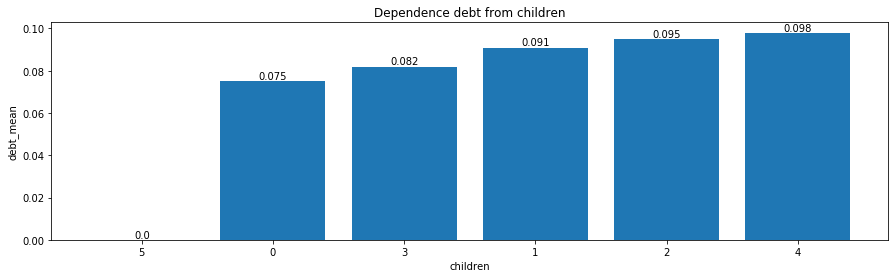

In [59]:
dep_debt('children')

**Зависимость просрочек платежей от семейного положения**: 

Наибольшее число просрочек связано с клиентами без официально оформленных семейных отношений (не в браке, гражданский брак в порядке убывания). Самыми дисциплинированными являются люди, имеющие или имевшие когда-либо официально оформленные семейные отношения ввиду четкого планирования собственно бюджета из-зиа своих обязательств перед своими бывшими и текущими семьями. Особо следует отметь лиц, потерявших своих близких - в таких обстоятельствах жизни они являются самыми ответственными заемщиками.

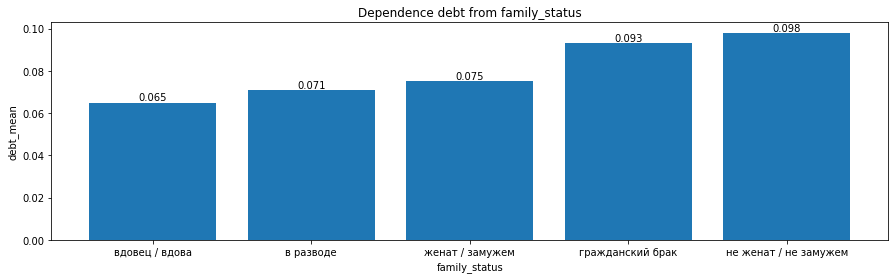

In [60]:
dep_debt('family_status')

**Зависимость просрочек платежей от уровня дохода**: 

Клиенты с самым малым (<=50000) и с самым высоким (>500000) уровнем дохода допускают меньше всего просрочекЖ первые в силу оганичения возможностей в части получения больших сумм кредита и невысоких сумм периодических платежей, а также строго планирования бюджета, вторые - в силу широких возможностей в части покрытия свокй долговой нагрузки. В средних группах по доходу наблюдается пропорциональный рост просрочек с ростом выделенных границ дохода, что вероятно вызвано дополнительными возникающими  запросами и потребностями заемщиков.

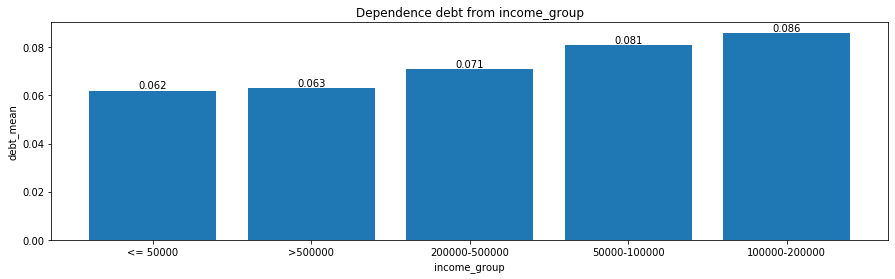

In [61]:
dep_debt('income_group')

**Зависимость просрочек платежей от целей кредита**: 

Самыми надежными являются кредиты взятые на недвижимость, особенно на жилую - это "уникальные" дорогие покупки, которые требуют хорошо расчитаного подхода в покрытии расходов на них, они обладают высокой инвестиционной привлекательностью, а их потеря или просрочка погашения по ним могут привести к тяжёлым последствиям для самого заёмщика. Самой высокой долей просрочек обладают кредиты на автомобиль, образование и савдьбу - эмоцианольно-мотивационные покупки которые легко оформить, последующий совокупный положительный эффект от их приобретения может упасть в виду суъективных особенностей самого замщика.

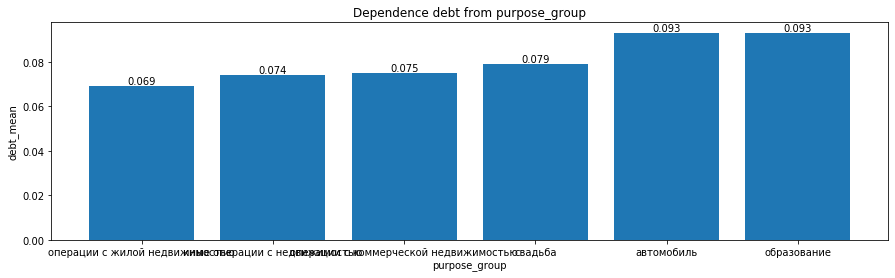

In [62]:
dep_debt('purpose_group')